In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("C:/Users/argad/Desktop/Demand_data_HEADER.csv")

In [2]:
'''
Data set Description

.
The dataset contain hourly energy consumption data from 2013 to 2017 for Maharashtra state
'Day', :-  (1,2,3) : 1= (Monday to Friday), 2= (Saturday and Sunday), 3= State Holiday
'Date', :-  (1 to 31)
'Month', :- (1 to 12)
'Season', :- 1=winter, 2=summer, 3=rainy
'Year', :- 2013 to 2017
'Hour', :- (1 to 24)
'RestMH',:- (State energy consumption excluding Mumbai)
'MUMBAI',:- (Energy consumption for Mumbai)
'MH_STATE':- State energy consumption(REstMH+Mumbai)

    
'''

"\nData set Description\n\n.\nThe dataset contain hourly energy consumption data from 2013 to 2017 for Maharashtra state\n'Day', :-  (1,2,3) : 1= (Monday to Friday), 2= (Saturday and Sunday), 3= State Holiday\n'Date', :-  (1 to 31)\n'Month', :- (1 to 12)\n'Season', :- 1=winter, 2=summer, 3=rainy\n'Year', :- 2013 to 2017\n'Hour', :- (1 to 24)\n'RestMH',:- (State energy consumption excluding Mumbai)\n'MUMBAI',:- (Energy consumption for Mumbai)\n'MH_STATE':- State energy consumption(REstMH+Mumbai)\n\n    \n"

In [3]:
data.shape

(43127, 9)

In [4]:
data.columns

Index(['Day', 'Date', 'Month', 'Season', 'Year', 'Hour', 'RestMH', 'MUMBAI',
       'MH_STATE'],
      dtype='object')

In [5]:
data.describe

<bound method NDFrame.describe of        Day  Date  Month  Season  Year  Hour  RestMH  MUMBAI  MH_STATE
0        1     1      1       1  2013     1   11289    1652   12941.0
1        1     1      1       1  2013     2   11116    1525   12641.0
2        1     1      1       1  2013     3   11019    1441   12460.0
3        1     1      1       1  2013     4   10889    1391   12280.0
4        1     1      1       1  2013     5   11201    1373   12574.0
...    ...   ...    ...     ...   ...   ...     ...     ...       ...
43122    2    31     12       1  2017    20   13389    2041   15430.0
43123    2    31     12       1  2017    21   12529    1995   14524.0
43124    2    31     12       1  2017    22   11724    1904   13628.0
43125    2    31     12       1  2017    23   11418    1795   13213.0
43126    2    31     12       1  2017    24   11558    1679   13237.0

[43127 rows x 9 columns]>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43127 entries, 0 to 43126
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       43127 non-null  int64  
 1   Date      43127 non-null  int64  
 2   Month     43127 non-null  int64  
 3   Season    43127 non-null  int64  
 4   Year      43127 non-null  int64  
 5   Hour      43127 non-null  int64  
 6   RestMH    43127 non-null  int64  
 7   MUMBAI    43127 non-null  int64  
 8   MH_STATE  43127 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 3.0 MB


In [7]:
data.isnull().sum()

Day         0
Date        0
Month       0
Season      0
Year        0
Hour        0
RestMH      0
MUMBAI      0
MH_STATE    0
dtype: int64

In [8]:
corr1=data.corr()
print(corr1)

               Day      Date     Month    Season      Year      Hour  \
Day       1.000000 -0.013418  0.003037 -0.026100 -0.000115  0.000089   
Date     -0.013418  1.000000  0.008590  0.010571 -0.001476 -0.000045   
Month     0.003037  0.008590  1.000000  0.129433 -0.001125 -0.000061   
Season   -0.026100  0.010571  0.129433  1.000000 -0.003847  0.000035   
Year     -0.000115 -0.001476 -0.001125 -0.003847  1.000000  0.000055   
Hour      0.000089 -0.000045 -0.000061  0.000035  0.000055  1.000000   
RestMH   -0.029801  0.001015 -0.151717 -0.098533  0.468068  0.038106   
MUMBAI   -0.060925  0.008759  0.199651 -0.049421 -0.119108  0.165037   
MH_STATE -0.066779  0.001751 -0.123001 -0.053713  0.449010  0.122651   

            RestMH    MUMBAI  MH_STATE  
Day      -0.029801 -0.060925 -0.066779  
Date      0.001015  0.008759  0.001751  
Month    -0.151717  0.199651 -0.123001  
Season   -0.098533 -0.049421 -0.053713  
Year      0.468068 -0.119108  0.449010  
Hour      0.038106  0.165037  0.1

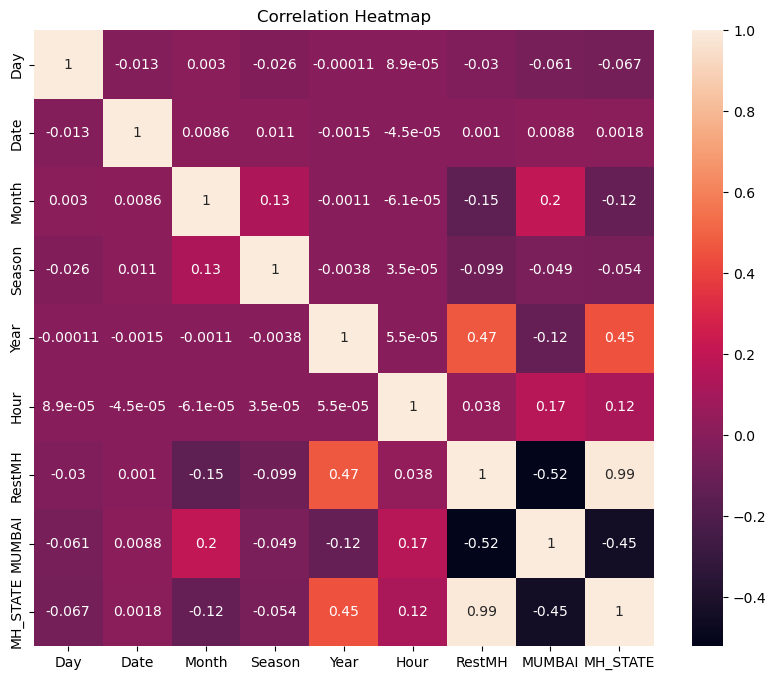

In [9]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr1,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
data.rename(columns={'Day': 'Type_of_day',  'Date': 'Day'}, inplace=True)

data["New_Date"]=pd.to_datetime(data[['Day','Month','Year']]).dt.date

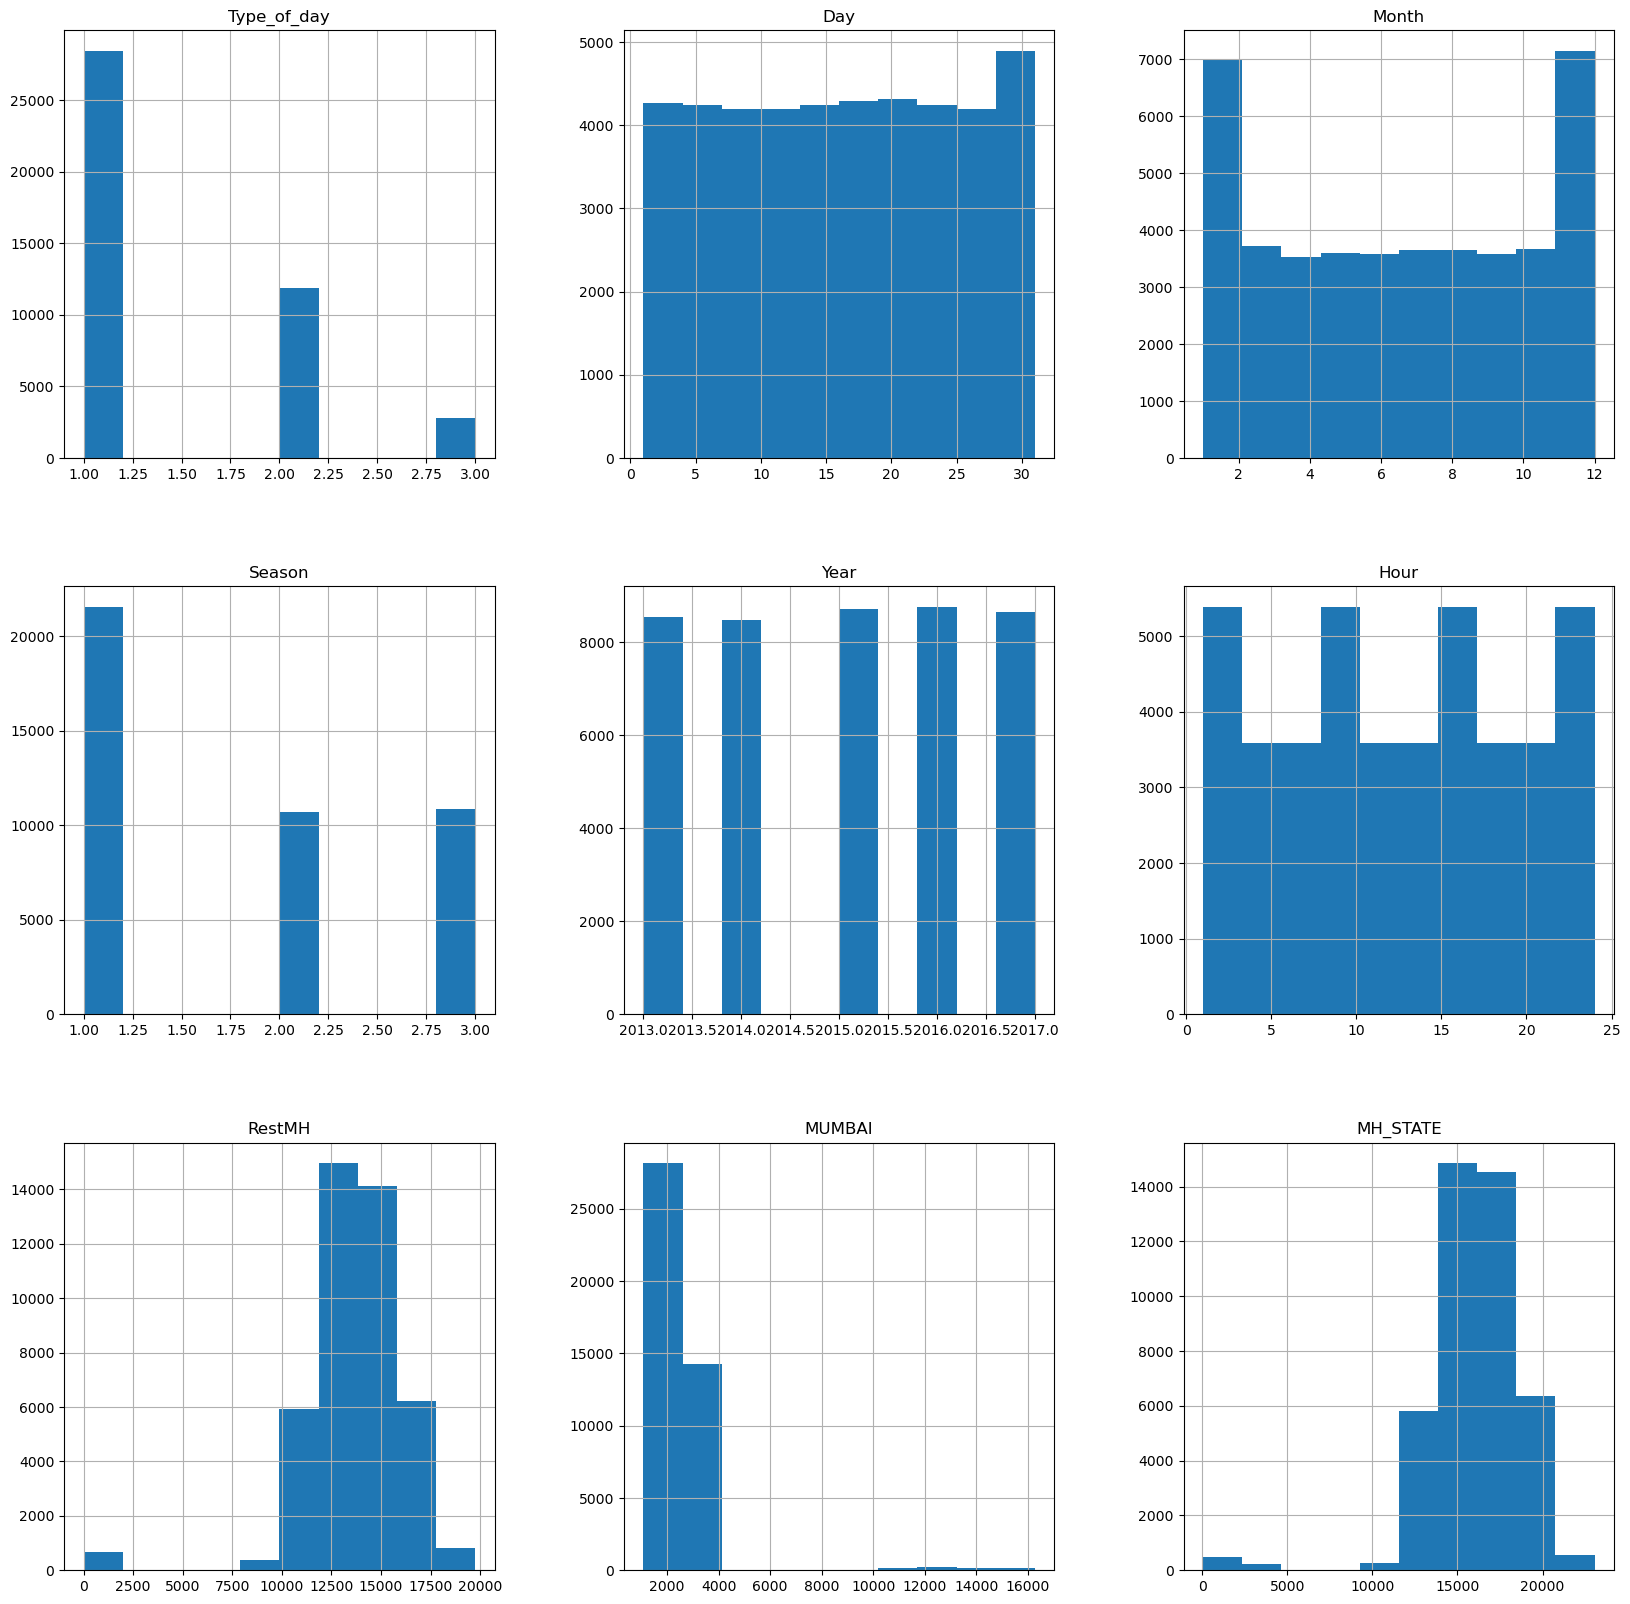

In [11]:
p1=data.hist(figsize=(20,20))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

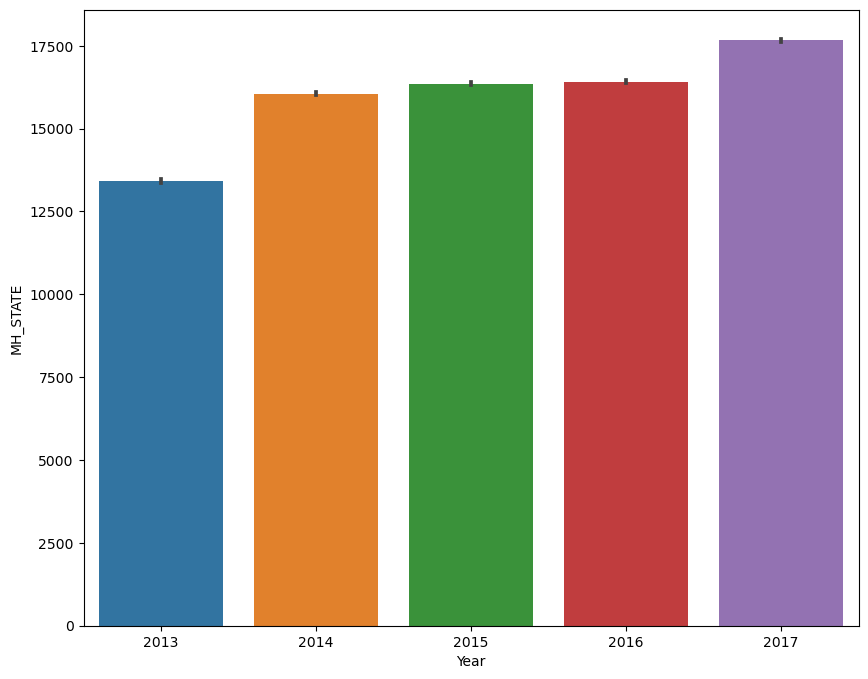

In [12]:
#Energy consumed in year 
plt.subplots(figsize=(10, 8))
sns.barplot(x=data["Year"],y=data["MH_STATE"],data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

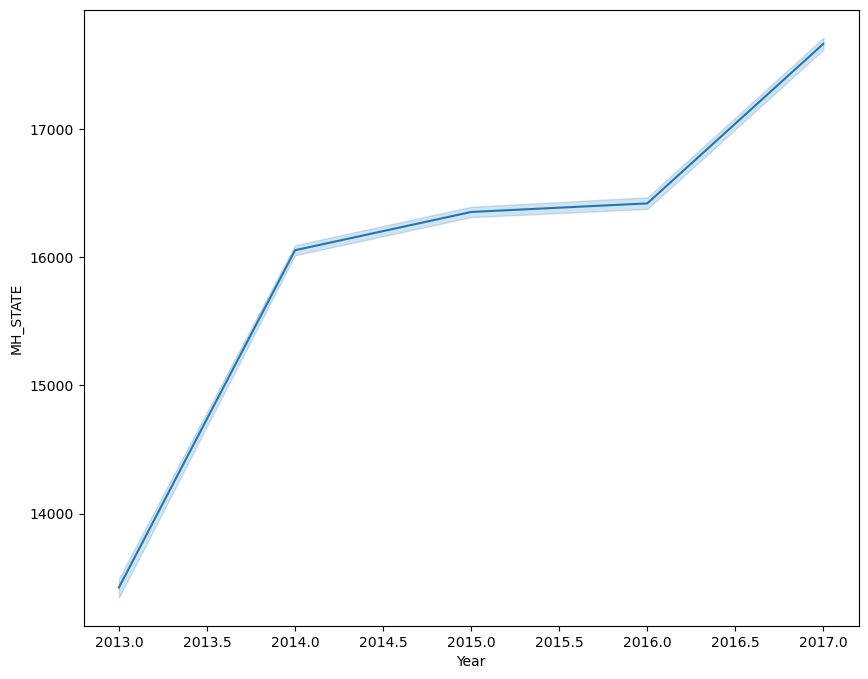

In [13]:
#Line plot
plt.subplots(figsize=(10, 8))
sns.lineplot(x=data["Year"],y=data["MH_STATE"],data=data)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

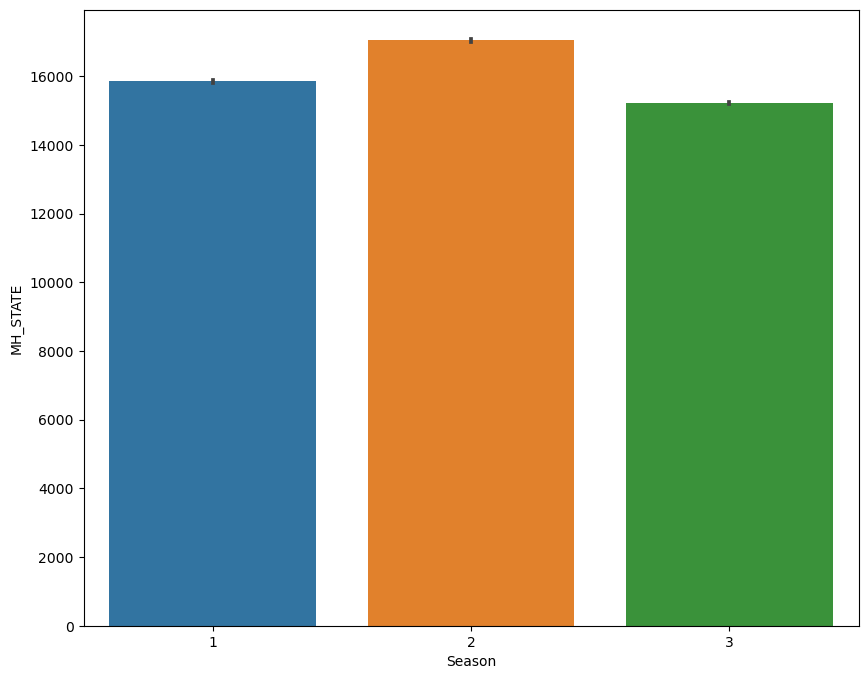

In [14]:
#Energy consumed in season
plt.subplots(figsize=(10, 8))
sns.barplot(x=data["Season"],y=data["MH_STATE"],data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

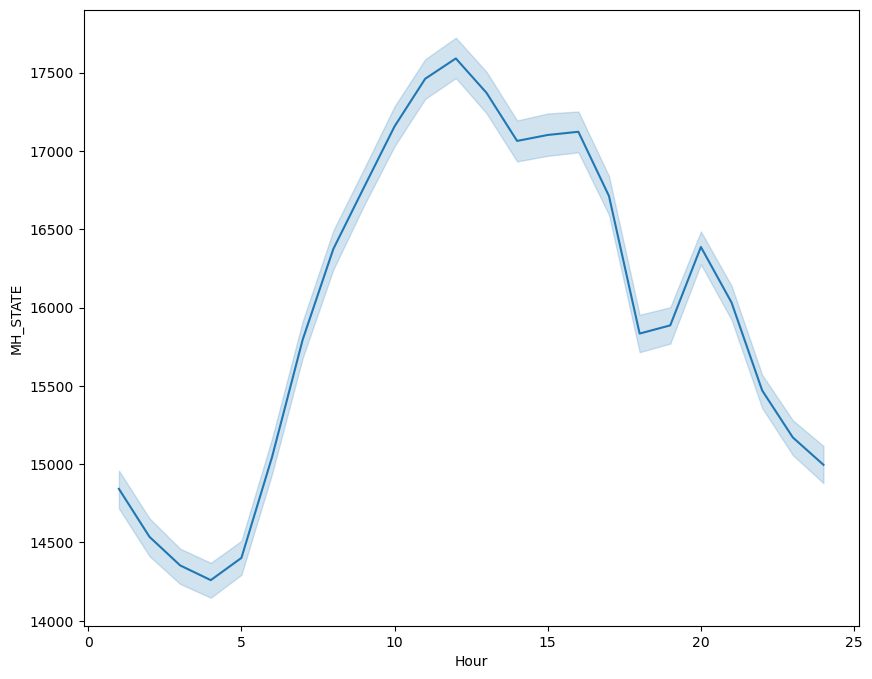

In [15]:
# Energy consumed in hour  
plt.subplots(figsize=(10, 8))
sns.lineplot(x=data["Hour"],y=data["MH_STATE"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

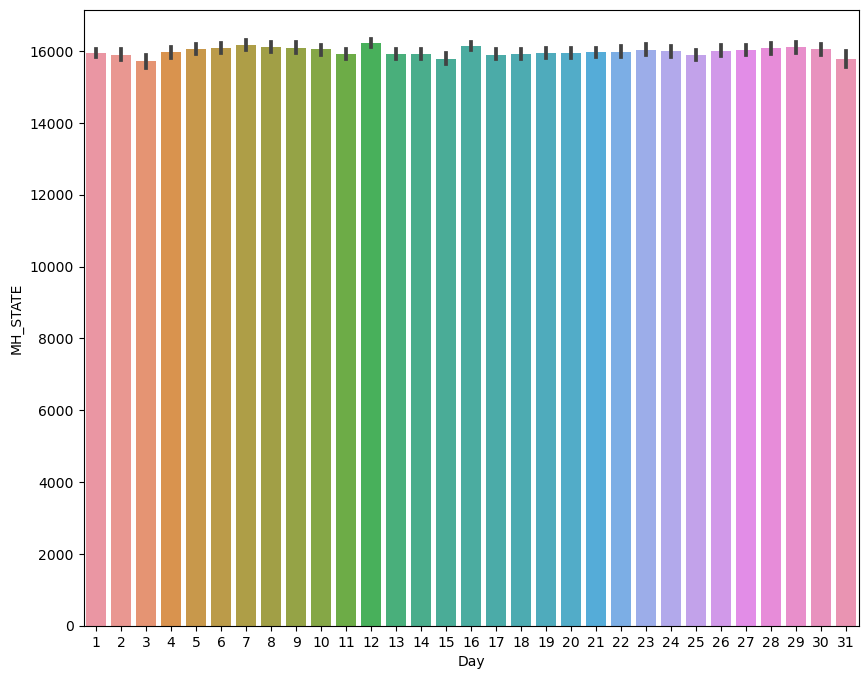

In [16]:
#Energy consumed in a day
plt.subplots(figsize=(10, 8))
sns.barplot(x=data["Day"],y=data["MH_STATE"],data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

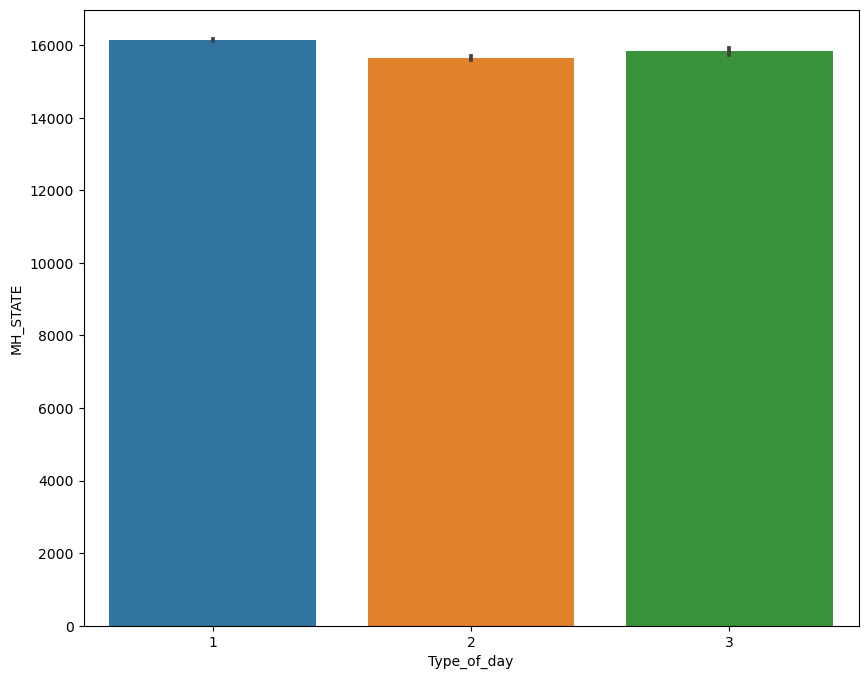

In [17]:
#Energy consumed in a  type of day day
plt.subplots(figsize=(10, 8))
sns.barplot(x=data["Type_of_day"],y=data["MH_STATE"],data=data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

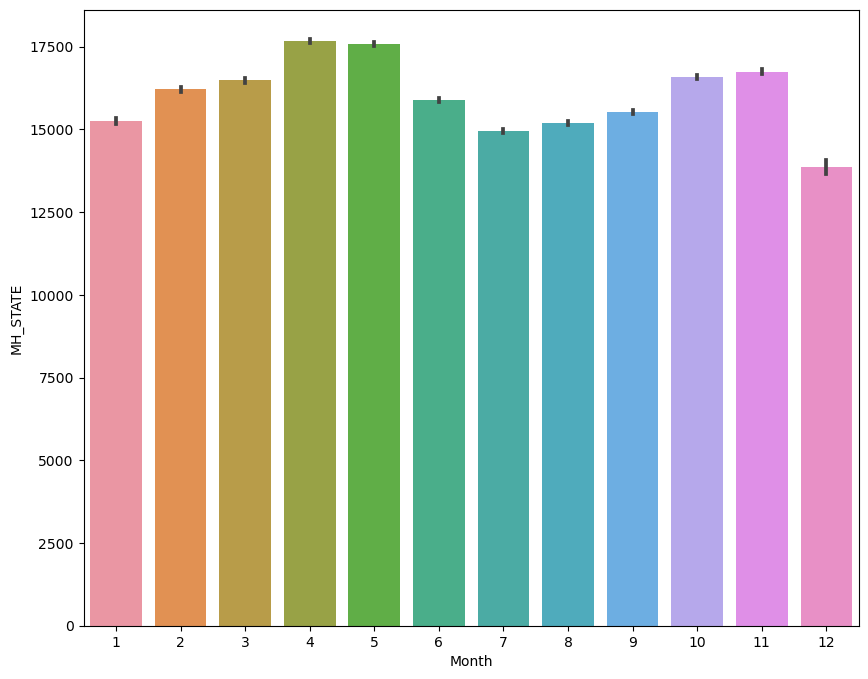

In [18]:
#Energy consumed in a month
plt.subplots(figsize=(10, 8))
sns.barplot(x=data["Month"],y=data["MH_STATE"],data=data)
plt.show

In [21]:
data["New_Date"]=pd.to_datetime(data[['Day','Month','Year']]).dt.date

In [24]:
data[data["MH_STATE"]==data["MH_STATE"].min()]

,Type_of_day,Day,Month,Season,Year,Hour,RestMH,MUMBAI,MH_STATE,New_Date
17079,3,3,1,1,2015,17,2135,14777,49.86,2015-01-03


In [25]:
data[data["MH_STATE"]==data["MH_STATE"].max()]

,Type_of_day,Day,Month,Season,Year,Hour,RestMH,MUMBAI,MH_STATE,New_Date
36611,1,30,3,1,2017,13,19745,3310,23055.0,2017-03-30


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#Here we are reading our csv file 
data = pd.read_csv("C:/Users/argad/Desktop/Demand_data_HEADER.csv")

In [4]:
# Here we Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Date'].astype(str))

In [5]:
data.drop(['Day', 'Month', 'Year', 'Season', 'Hour', 'RestMH', 'MUMBAI'], axis=1, inplace=True)

In [6]:
# Group by Date and sum the values in MH_STATE column
df = data.groupby('Date')['MH_STATE'].sum().reset_index()

In [7]:
# Fit ARIMA model
model = ARIMA(df['MH_STATE'], order=(1, 1, 1)).fit()

In [8]:
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='D')[1:] 

In [9]:
# Make predictions for the future date
future_predictions = model.forecast(steps=30)

In [10]:
future_df = pd.DataFrame({'Date': future_dates, 'MH_STATE': future_predictions})
future_df

,Date,MH_STATE
1797,2018-01-01,392527.962963
1798,2018-01-02,393887.050941
1799,2018-01-03,394402.292005
1800,2018-01-04,394597.623992
1801,2018-01-05,394671.675902
1802,2018-01-06,394699.749570
1803,2018-01-07,394710.392521
1804,2018-01-08,394714.427348
1805,2018-01-09,394715.956983
1806,2018-01-10,394716.536880


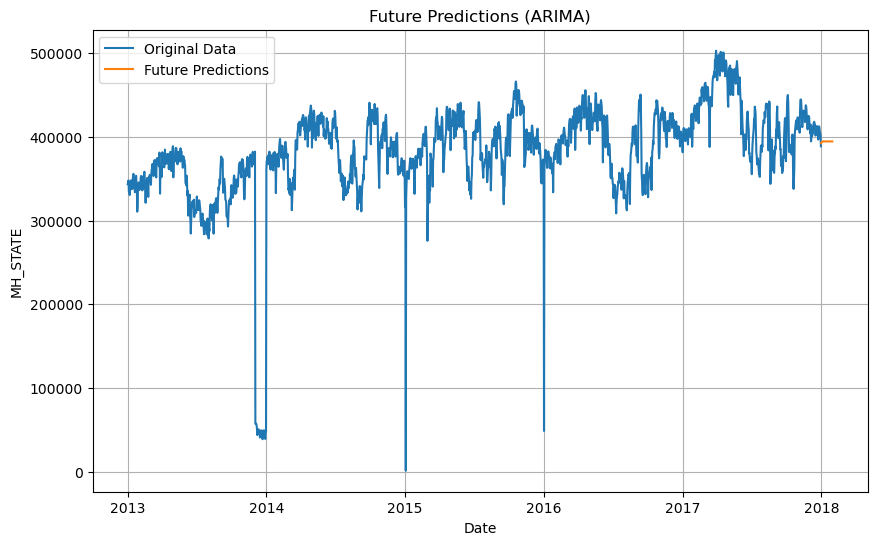

In [11]:
# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['MH_STATE'], label='Original Data')
plt.plot(future_df['Date'], future_df['MH_STATE'], label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('MH_STATE')
plt.title('Future Predictions (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#SARIMA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
data = pd.read_csv("C:/Users/argad/Desktop/Demand_data_HEADER.csv")

In [15]:
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-' + data['Date'].astype(str))

In [16]:
data.drop(['Day', 'Month', 'Year', 'Season', 'Hour', 'RestMH', 'MUMBAI'], axis=1, inplace=True)

In [17]:
df = data.groupby('Date')['MH_STATE'].sum().reset_index()
df.head()

,Date,MH_STATE
0,2013-01-01,343597.0
1,2013-01-02,346551.0
2,2013-01-03,348147.0
3,2013-01-04,334925.0
4,2013-01-05,338129.0


In [18]:
model = SARIMAX(df['MH_STATE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

In [19]:
future_dates = pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='D')[1:]

In [20]:
future_predictions = model.forecast(steps=30)

In [21]:
future_df = pd.DataFrame({'Date': future_dates, 'MH_STATE': future_predictions})
future_df

,Date,MH_STATE
1797,2018-01-01,391128.639860
1798,2018-01-02,393474.428931
1799,2018-01-03,395652.746289
1800,2018-01-04,396111.302774
1801,2018-01-05,396161.179309
1802,2018-01-06,396121.144677
1803,2018-01-07,394859.937493
1804,2018-01-08,396897.161536
1805,2018-01-09,394615.712818
1806,2018-01-10,397954.199282


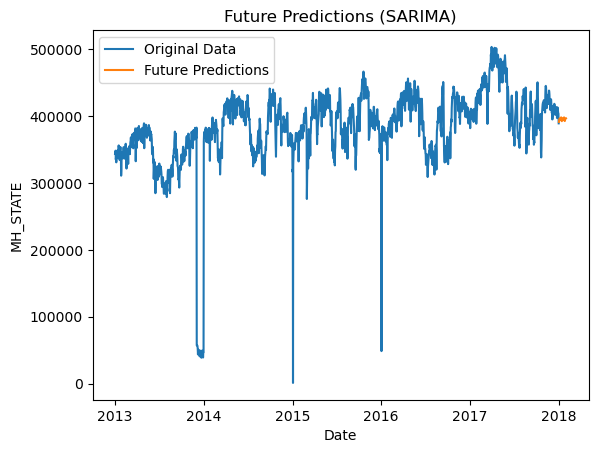

In [22]:
plt.plot(df['Date'], df['MH_STATE'], label='Original Data')
plt.plot(future_df['Date'], future_df['MH_STATE'], label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('MH_STATE')
plt.title('Future Predictions (SARIMA)')
plt.legend()
plt.show()

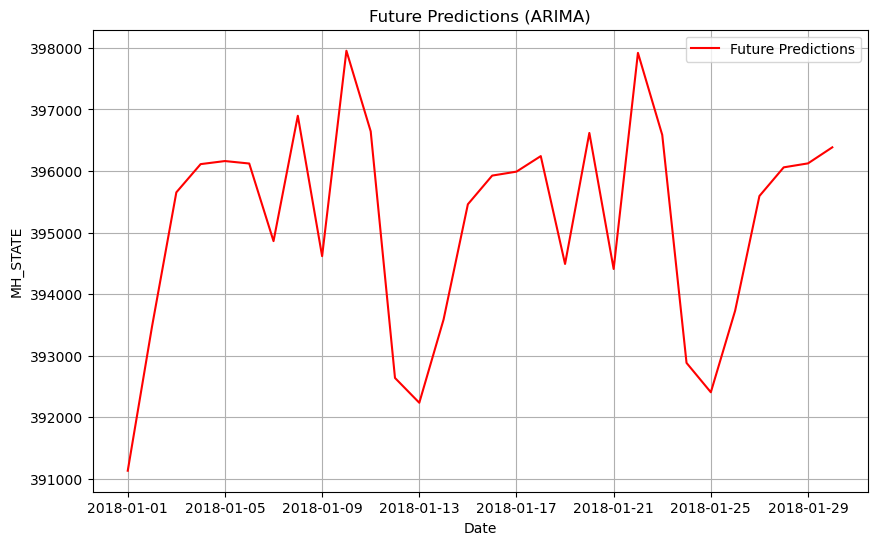

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(future_df['Date'], future_df['MH_STATE'], label='Future Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('MH_STATE')
plt.title('Future Predictions (ARIMA)')
plt.legend()
plt.grid(True)
plt.show()

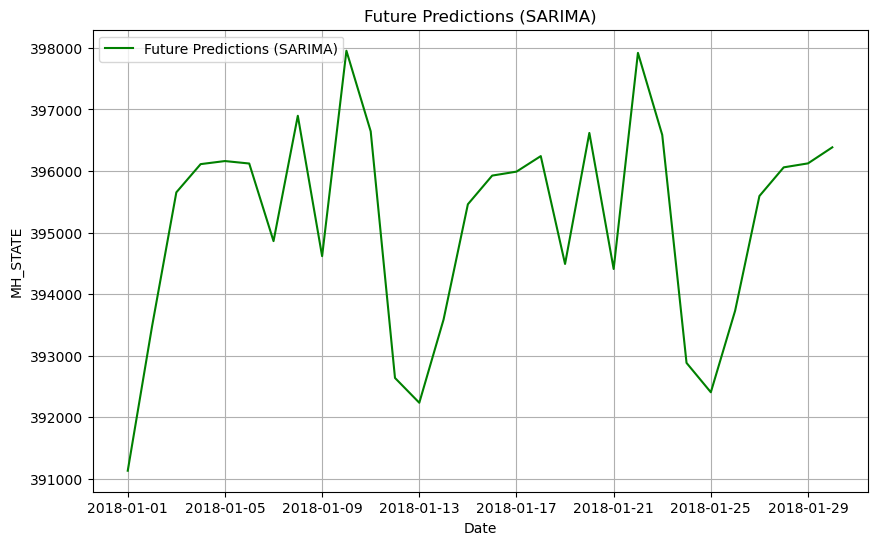

In [24]:
# Plot future predicted values
plt.figure(figsize=(10, 6))
plt.plot(future_df['Date'], future_df['MH_STATE'], label='Future Predictions (SARIMA)', color='green')
plt.xlabel('Date')
plt.ylabel('MH_STATE')
plt.title('Future Predictions (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()